# Harmadik gyakorlat: Bevezető a plotolásba és a képelemzésbe

A múlt órán a numerikus integrálással fejeztük be a munkát: foglalkozzunk újra egy kicsit a függvényekkel. Ahogy a múltkor is csináltuk, kezdjünk a linspace-el:

In [3]:
import numpy as np

t = np.linspace(0,10, 1000) #0,10 közötti intervallum felbontását tartalmazó, 1x1000-es array
sint = np.sin(t) #egyváltozós függvények elemenként kerülnek kiértékelésre.

Menjünk tovább, rajzoljuk is ki a függvényünket! Ebben a `matplotlib` könyvtár lesz segítségünkre.

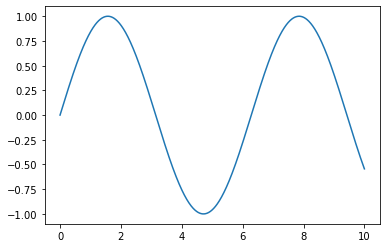

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
#Ezt érdemes minden plt plot elé odaírni: ez a "magic command" jelzi a jupyternek, hogy ebben a cellában 
#plot van. Sokszor enélkül is működik.
plt.plot(t, sint) #Plot: t a vízszintes, sint a függőleges tengely

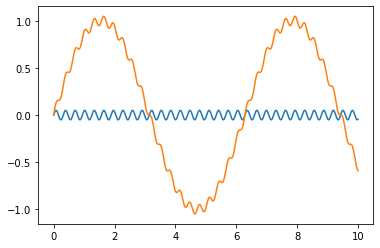

In [5]:
%matplotlib inline

#plt.plot(t, sint)
#csináljunk egy kis magasfrekvenciás zajt!
sin100t = np.sin(20*t)*0.05
plt.plot(t, sin100t)
#"ültessük rá!" összeadással.
signalWnoise = sint + sin100t
plt.plot(t, signalWnoise)

### Zajszűrés mozgóátlag szűrővel

Mechatronika alapjaiból találkozhattatok ezzel a módszerrel; haladjunk végig a jelen, és a szűr jel pillanatnyi értékét állítsuk elő úgy, hogy mindig az előtte lévő $k$ darab zajos érték átlaga legyen.

In [6]:
def moving_avg(my_list, N):
    moving_avgs=[]
    cumulated_sums=[]
    cumulated_sum=0
    for i in range(0,len(my_list)):
        cumulated_sum+=my_list[i]
        cumulated_sums.append(cumulated_sum)
        if(i>N):
            moving_avg=(cumulated_sums[i]-cumulated_sums[i-N])/N
            moving_avgs.append(moving_avg)
        else:
            moving_avgs.append(my_list[i])
        
    return moving_avgs

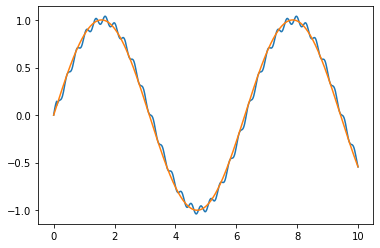

In [7]:
#Próbálgassuk a szűrőnket!
%matplotlib inline
filteredSignal = moving_avg(signalWnoise,10)
plt.plot(t, filteredSignal)
plt.plot(t, sint) #fáziskésés, majd torzítás!

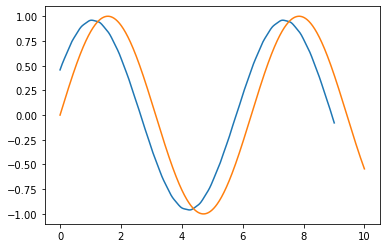

In [8]:
#szemfüleseknek: a diszkrét idejű konvolúció a segítségünkre lehet! Erről lesz majd még szó.

def movAvgConvolve(signal, N, mode='same'):
    weights = np.ones(N)/N
    return np.convolve(signal, weights, mode = mode)

N=100
filteredSignal = movAvgConvolve(signalWnoise,N,'valid')
plt.plot(t[0:len(filteredSignal)], filteredSignal)
plt.plot(t, sint) #fáziskésés, majd torzítás!

## Képelemzés

Dolgozzunk fel képeket a Python segítségével!

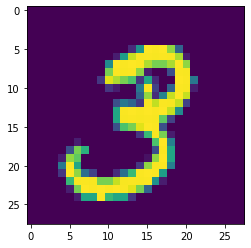

float64
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.       

In [11]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# a képek is csak mátrixok!
img = np.load("szam5.npy").astype(np.float64) #.astype() konvertálás. Float16-ot nem szerette sajnos.
img = img.reshape(28,28) #1,784 dimenziójú tömbből így lehet képet csinálni!
plt.imshow(img)
plt.show() #így is elő lehet hívni a plotot.
print(img.dtype)
print(img)

In [12]:
#oldjuk meg ugyanezt az OpenCV könyvtárral!
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("rgb.png") #kép beolvasása
imgGray = cv2.imread("rgb.png",0) #plusz argumentum: fekete-fehér kép  beolvasásához.

cv2.imshow('OpenCV',img.astype(np.float))
if cv2.waitKey(0):
    cv2.destroyAllWindows()

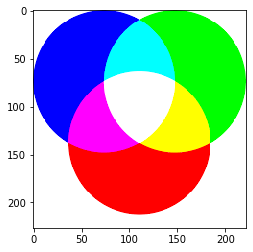

In [13]:
plt.imshow(img) #Piros és kék felcserélése! Eltérő színtereket használtunk.

In [6]:
##rgb keverő - lesz szó róla következő órán ##

import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    # mit jelent a 27? 
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

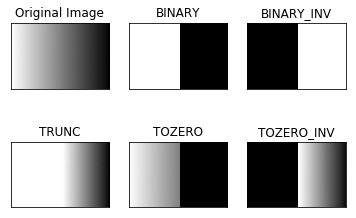

In [67]:
#thresholdok bemutatása

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread(r"C:\Users\Administrator\Downloads\grad.jpg",0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

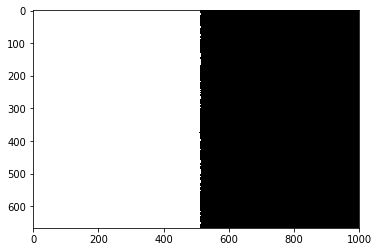

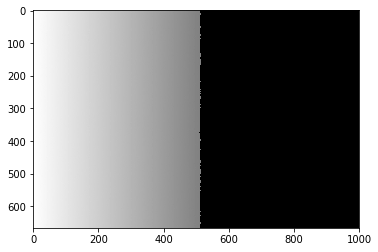

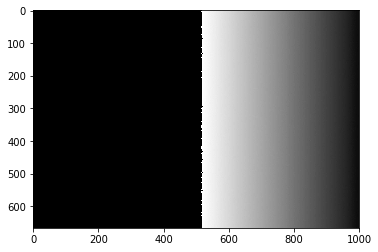

In [71]:
#maszkok alkalmazása

plt.imshow((img>128),'gray') #így is lehet thresholdozni!
plt.show()
plt.imshow(img*(img>128),'gray') #maszkok alkalmazása diadikus szorzattal
plt.show()
plt.imshow(img*(img<128),'gray')
plt.show()